<a href="https://colab.research.google.com/github/aparnagkumar/Python/blob/master/Compute_performance_metrics_for_the_given_Y_and_Y_score_without_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute performance metrics for the given Y and Y_score without sklearn

In [0]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [0]:
df=pd.read_csv('5_a.csv')
df.head(5)

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [0]:
df.shape

(10100, 2)

In [0]:
df.columns

Index(['y', 'proba'], dtype='object')

In [0]:
df['y'].value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [0]:
df['predicted_y']=df['proba'].apply(lambda x: 1 if x>0.5 else 0)

In [0]:
countTP = (df['y'].eq(1) & df['predicted_y'].eq(1)).sum()
countFP = (df['y'].eq(0) & df['predicted_y'].eq(1)).sum()
countFN = (df['y'].eq(1) & df['predicted_y'].eq(0)).sum()
countTN = (df['y'].eq(0) & df['predicted_y'].eq(0)).sum()

In [0]:
conflst=[countTP, countFP, countFN, countTN]

In [0]:
confmatrix=np.asarray(conflst)
confmatrix.reshape(2,2)

array([[10000,   100],
       [    0,     0]], dtype=int64)

In [0]:
precision=countTP/(countTP+countFP)
recall=countTP/(countTP+countFN)
f1=2*((recall*precision)/(precision+recall))
print("F1 score is:",f1)

F1 score is: 0.9950248756218906


In [0]:
Accuracy=(countTN+countTP)/len(df)
print('Accuracy is', Accuracy)

Accuracy is 0.9900990099009901


In [0]:
#again reading df 
df=pd.read_csv('5_a.csv')

In [0]:
"""AUC CALCULATION"""
tlset=set(df['proba']) #to make sure there is only unique values we use set
tlst=sorted(tlset)
TPRlst=[]
FPRlst=[]
for ele in tlst:
    threshhold=ele
    df['predicted_y']=df['proba'].apply(lambda x: 1 if x>threshhold else 0)
    TP = (df['y'].eq(1) & df['predicted_y'].eq(1)).sum()
    FP = (df['y'].eq(0) & df['predicted_y'].eq(1)).sum()
    FN = (df['y'].eq(1) & df['predicted_y'].eq(0)).sum()
    TN = (df['y'].eq(0) & df['predicted_y'].eq(0)).sum()
    TPR=TP/(TP+FN)
    FPR=FP/(FP+TN)
    TPRlst.append(TPR)
    FPRlst.append(FPR)

In [0]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(FPRlst, TPRlst)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Figure size 640x480 with 1 Axes>

In [0]:
tpr_array=np.asarray(TPRlst)
fpr_array=np.asarray(FPRlst)

In [0]:
#https://stackoverflow.com/questions/11973800/trapz-giving-weird-results
np.trapz(np.sort(tpr_array), np.sort(fpr_array))

0.48829900000000004

In [0]:
#Double checking the answer
from sklearn.metrics import roc_auc_score
roc_auc_score(df['y'], df['predicted_y'])

0.5

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [0]:
df2= pd.read_csv('5_b.csv')

In [0]:
df2.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [0]:
df2['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [0]:
df2['predicted_y']=df2['proba'].apply(lambda x: 1 if x>0.5 else 0)
countTP = (df2['y'].eq(1) & df2['predicted_y'].eq(1)).sum()
countFP = (df2['y'].eq(0) & df2['predicted_y'].eq(1)).sum()
countFN = (df2['y'].eq(1) & df2['predicted_y'].eq(0)).sum()
countTN = (df2['y'].eq(0) & df2['predicted_y'].eq(0)).sum()
precision=countTP/(countTP+countFP)
recall=countTP/(countTP+countFN)
f1=2*((recall*precision)/(precision+recall))
print("F1 score is:",f1)

F1 score is: 0.2791878172588833


In [0]:
Accuracy=(countTN+countTP)/len(df)
print('Accuracy is', Accuracy)

Accuracy is 0.9718811881188119


In [0]:
conflst=[countTP, countFP, countFN, countTN]
confmatrix=np.asarray(conflst)
confmatrix.reshape(2,2)

array([[  55,  239],
       [  45, 9761]], dtype=int64)

In [0]:
#Resetting everything
df2= pd.read_csv('5_b.csv')

In [0]:
"""AUC CALCULATION"""
tset=set(df2['proba'])#to make sure there is only unique values we use set
tlst=sorted(tset)
TPRlst=[]
FPRlst=[]
for ele in tlst:
    threshhold=ele
    df2['predicted_y']=df2['proba'].apply(lambda x: 1 if x>threshhold else 0)
    TP = (df2['y'].eq(1) & df2['predicted_y'].eq(1)).sum()
    FP = (df2['y'].eq(0) & df2['predicted_y'].eq(1)).sum()
    FN = (df2['y'].eq(1) & df2['predicted_y'].eq(0)).sum()
    TN = (df2['y'].eq(0) & df2['predicted_y'].eq(0)).sum()
    TPR=TP/(TP+FN)
    FPR=FP/(FP+TN)
    TPRlst.append(TPR)
    FPRlst.append(FPR)

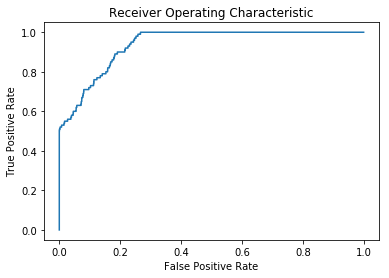

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(FPRlst, TPRlst)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
tpr_array=np.asarray(TPRlst)
fpr_array=np.asarray(FPRlst)

In [0]:
np.trapz(np.sort(tpr_array), np.sort(fpr_array))

0.9376570000000001

In [0]:
#Double checking the answer
from sklearn.metrics import roc_auc_score
roc_auc_score(df2['y'], df2['proba'])

0.9377570000000001

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [0]:
df3= pd.read_csv('5_c.csv')

In [0]:
df3.shape

(2852, 2)

In [0]:
df3.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [0]:
df3['y'].value_counts()

0    1805
1    1047
Name: y, dtype: int64

In [0]:
tset=set(df3['prob'])

In [0]:
tlst=sorted(tset)

In [0]:
"""AUC CALCULATION"""
#tset=set(df3['prob'])#to make sure there is only unique values we use set
#tlst=sorted(tset)
Adict={}
for ele in tlst:
    threshhold=ele
    df3['predicted_y']=df3['prob'].apply(lambda x: 1 if x>threshhold else 0)
    FP = (df3['y'].eq(0) & df3['predicted_y'].eq(1)).sum()
    FN = (df3['y'].eq(1) & df3['predicted_y'].eq(0)).sum()
    𝐴=(500*FN)+(100*FP)
    Adict.update({threshhold:A})
    #FNdict.update({threshhold:FN})

In [0]:
#Athrehold=[]
minval=min(Adict.values())
for threshhold, A in Adict.items():   
    if A == minval:
        print("The best threshold which makes A minimum is",threshhold)

The best threshold which makes A minimum is 0.22987164436159915


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [0]:
df4= pd.read_csv('5_d.csv')

In [0]:
df4.shape

(157200, 2)

In [0]:
df4.head(5)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [0]:
df4['SquareDiff']=(df4['y']-df4['pred'])**2

In [0]:
print("The mean square error is : ",df4['SquareDiff'].mean())

The mean square error is :  177.16569974554707


In [0]:
y_bar=df4['y'].mean()
df4['SStot']=(df4['y']-y_bar)**2
SStot=df4['SStot'].sum()
SSres=df4['SquareDiff'].sum()

In [0]:
print("R-squared:",(1-(SSres/SStot)))

R-squared: 0.9563582786990937


In [0]:
print("MAPE is:",abs(df4['y']-df4['pred']).sum()/df4['y'].sum()*100)

MAPE is: 12.91202994009687
